# Import 

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns


#time
import time

# Draw Function

In [ ]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

# Graph

In [ ]:
edges = []

with open("fb-pages-politician.txt", "r") as f: 
    for line in f:
        s = line.strip()
        a, b = s.split(",")
        edges.append((int(a), int(b)))

In [ ]:
graph = nx.Graph()
graph.add_edges_from(edges)
pos = nx.spring_layout(graph)

# Parameters 

In [ ]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))
print("CLUSTERING: %0.3f" % nx.average_clustering(graph))
print("RADIUS: ", nx.radius(graph))
print("DIAMETER: ", nx.diameter(graph))
print("DENSITY: %0.3f" % nx.density(graph))
print("IS CONNECTED: ", nx.is_connected(graph)) # se true, non abbiamo nodi isolati. Se false sarebbe utile calcolare il numero di componenti connesse

NODES:  5908
EDGES:  41729
CLUSTERING: 0.385
RADIUS:  7
DIAMETER:  14
DENSITY: 0.002
IS CONNECTED:  True


# Plot Graph

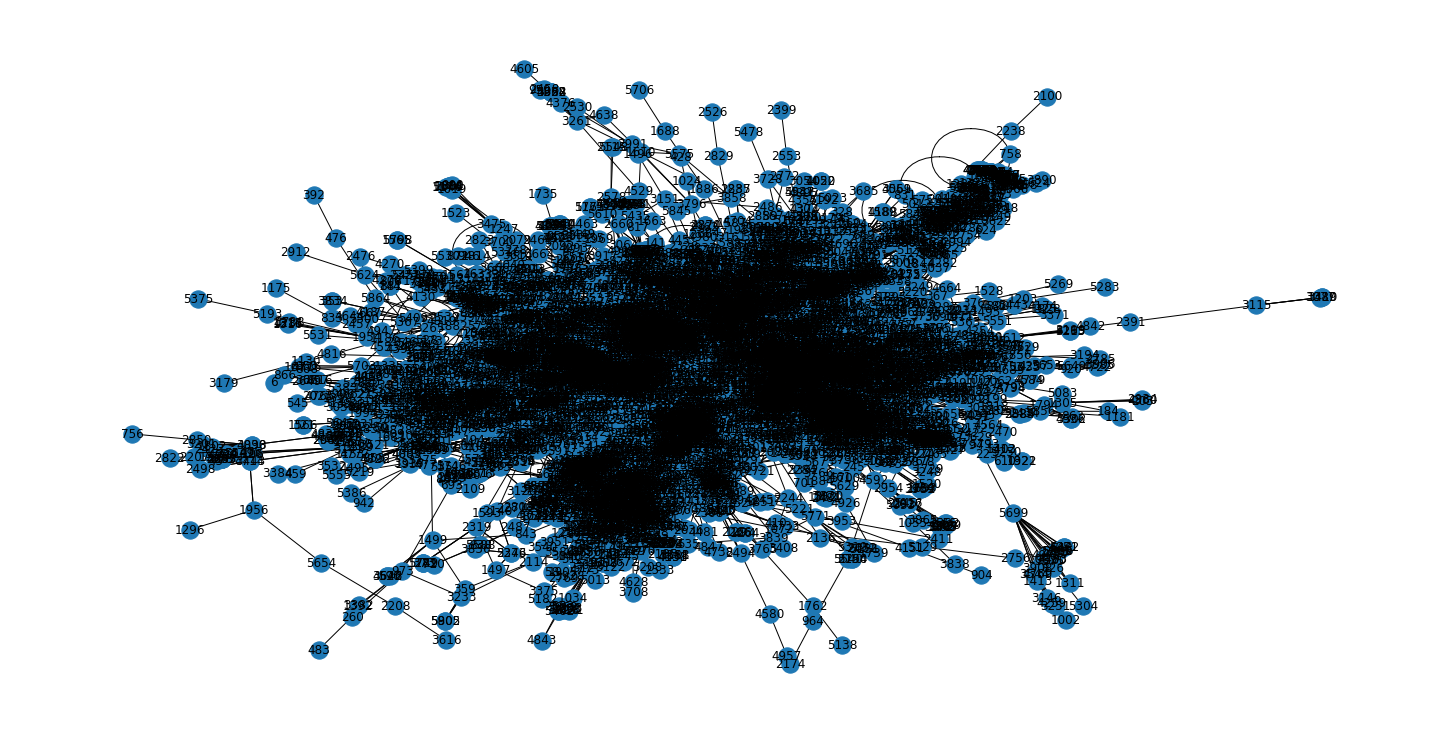

In [ ]:
plt.figure(figsize=(20,10))
nx.draw(graph, pos, with_labels=True)
plt.show()

# Degree Centrality

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


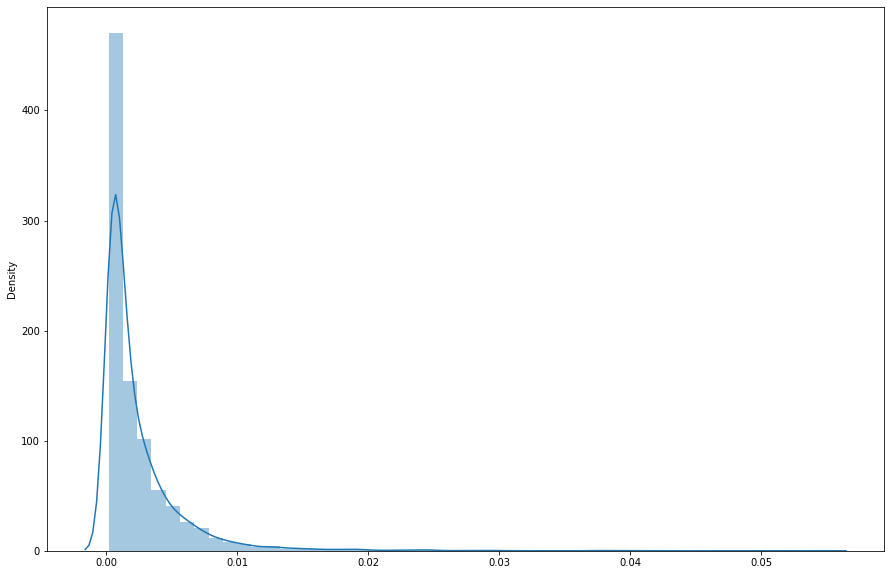

In [ ]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
sns.distplot(list(degree.values()), kde=True)

# Spring Layout 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


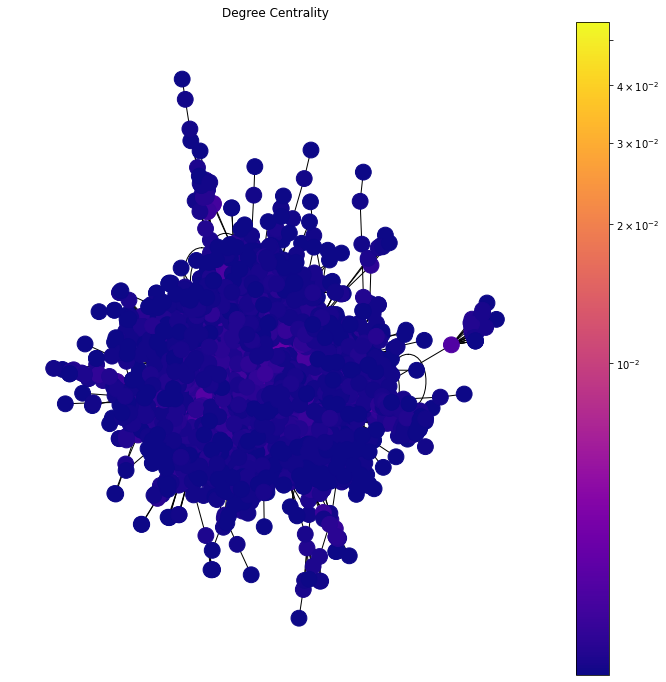

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


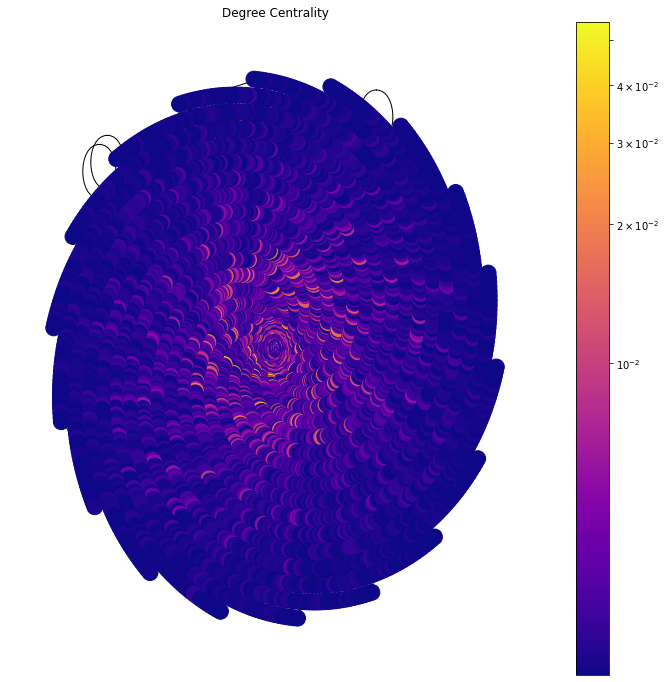

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


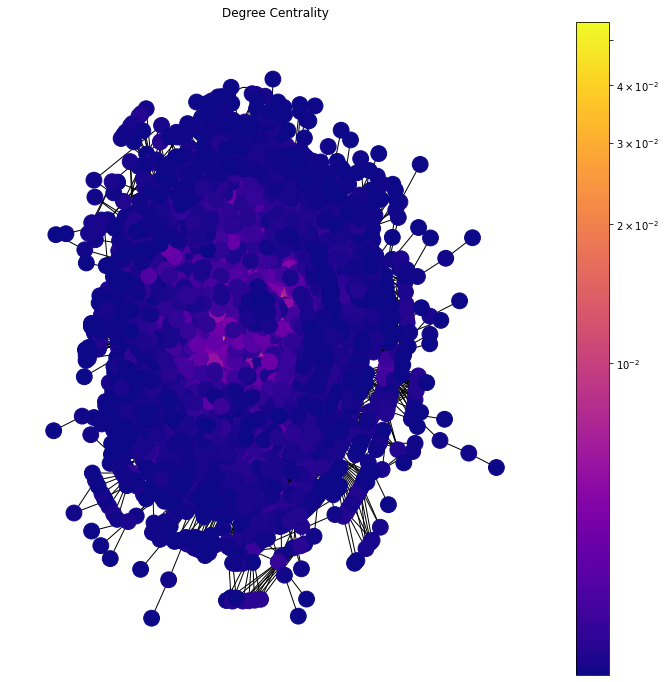

In [ ]:
#Kamada Kawai
plt.figure(figsize=(12,12))
pos = nx.kamada_kawai_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


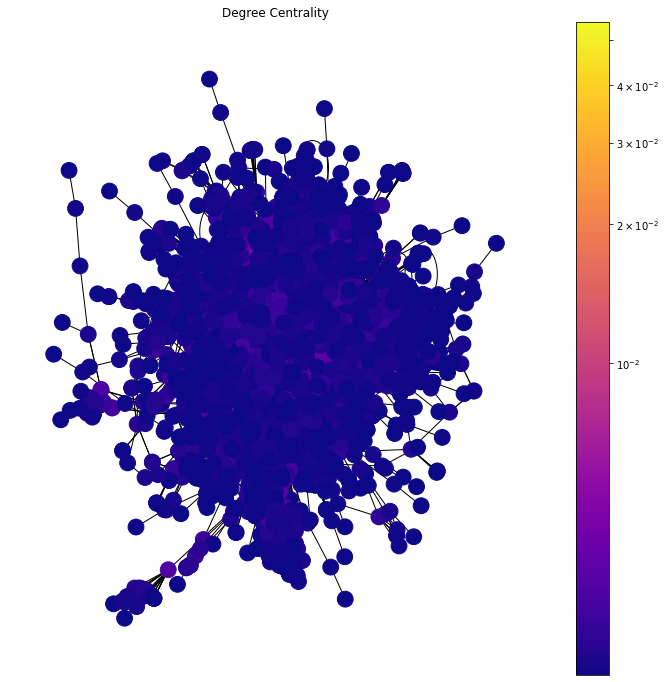

In [ ]:
#Fruchterman Reingold layout
plt.figure(figsize=(12,12))
pos = nx.fruchterman_reingold_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

In [ ]:
# bet = nx.betweenness_centrality(graph)
# plt.figure(figsize=(15,10))
# sns.distplot(list(bet.values()), kde=False)
# print([h.get_height() for h in sns.distplot(list(bet.values()), kde=False).patches])


#BONUS : community.greedy_modularity_communities

In [ ]:
# BONUS
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph)
communities

[frozenset({4098,
            4102,
            4103,
            8,
            4107,
            12,
            13,
            11,
            4109,
            4113,
            4114,
            18,
            22,
            24,
            26,
            27,
            4123,
            4124,
            29,
            4126,
            33,
            4129,
            4134,
            4136,
            42,
            4150,
            4152,
            4153,
            57,
            63,
            4161,
            4162,
            4163,
            67,
            70,
            73,
            77,
            81,
            4178,
            83,
            4186,
            95,
            4192,
            4194,
            4195,
            4196,
            101,
            4198,
            105,
            4206,
            111,
            4208,
            4207,
            4211,
            4212,
            4215,
            119,
            128,
    

# CLIQUE 

- TODO: kplex ? non ho ben capito come fare devo ancora documentarmi
- DONE:  Analisi delle strutture presenti nel grafo: clique (per grafi piccoli & kcore


https://networkx.org/documentation/networkx-2.1/reference/algorithms/generated/networkx.algorithms.components.connected_component_subgraphs.html

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
graphs_connected_group = list(graph.subgraph(c) for c in nx.connected_components(graph))
for g in graphs_connected_group:
  print (g.edges())

[(0, 1972), (0, 5111), (0, 138), (0, 3053), (0, 1473), (0, 4978), (0, 4523), (0, 2334), (0, 1038), (0, 3923), (0, 3874), (0, 766), (0, 98), (0, 2676), (0, 1547), (0, 3622), (0, 5292), (0, 5455), (0, 2755), (0, 568), (0, 1849), (0, 980), (0, 1578), (0, 4674), (0, 876), (0, 3842), (0, 5866), (0, 3883), (0, 2524), (0, 961), (0, 5154), (0, 3372), (0, 2639), (0, 3099), (0, 2852), (0, 1909), (0, 4537), (0, 1676), (0, 4924), (0, 724), (0, 5855), (0, 4157), (0, 2051), (0, 4630), (1972, 98), (1972, 138), (1972, 480), (1972, 3087), (1972, 688), (1972, 724), (1972, 766), (1972, 848), (1972, 876), (1972, 961), (1972, 980), (1972, 1038), (1972, 1067), (1972, 5111), (1972, 3665), (1972, 3377), (1972, 3053), (1972, 4033), (1972, 2524), (1972, 253), (1972, 4978), (1972, 4523), (1972, 2334), (1972, 4185), (1972, 3874), (1972, 2676), (1972, 2998), (1972, 3622), (1972, 5292), (1972, 3489), (1972, 5455), (1972, 2755), (1972, 1578), (1972, 2569), (1972, 2639), (1972, 3842), (1972, 1473), (1972, 5866), (197

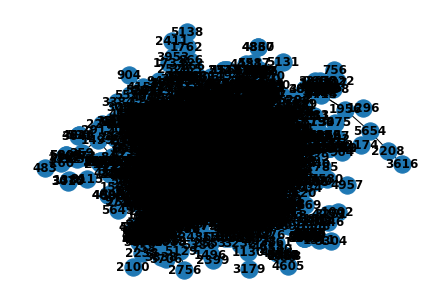

In [ ]:
nx.draw(g, with_labels=True, font_weight='bold')

In [ ]:
print('clique enumerate')
print(list(nx.algorithms.clique.enumerate_all_cliques(graph)))

print('find cliques')
print(list(nx.algorithms.clique.find_cliques(graph)))



'''
import networkx as nx
G = nx.make_clique_bipartite(G)
cliques = [v for v in G.nodes() if G.nodes[v]['bipartite'] == 0]
G = nx.bipartite.project(G, cliques)
G = nx.relabel_nodes(G, {-v: v - 1 for v in G})


G = nx.make_clique_bipartite(G, fpos=None, create_using=None, name=None) #Returns the bipartite clique graph corresponding to G.
'''

'''
cliques_plot = plt.subplot(121)
nx.draw(cliques, with_labels=True, font_weight='bold')
'''

clique enumerate


In [ ]:
#clique = nx.make_clique_bipartite(graph)
print('Number of Clique : {}'.format(nx.graph_clique_number(graph))) #Returns the clique number of the graph
print('Graph number of Clique : {}'.format(nx.graph_number_of_cliques(graph, cliques=clique))) #Returns the number of maximal cliques in the graph

print('Size of the largest maximal clique : {}'.format(nx.node_clique_number(graph))) #Returns the size of the largest maximal clique containing each given node.
print('Number of maximal clique for each node : {}'.format(nx.number_of_cliques(graph))) #Returns the number of maximal cliques for each node


node = 1972
print('Clique, containing node : {}  - {} '.format(node, nx.cliques_containing_node(graph, nodes=node)))

#weight_ = 0.7
#print('Clique {} with weight more than {} '.format(nx.max_weight_clique(graph, weight=weight_), weight_))  ERROR 'Node 0 does not have the requested weight field.'


'''

plt.figure(figsize=(20, 15), dpi=100)


nx.draw(clique, with_labels=True, font_weight='bold')
'''

Number of Clique : 21
Graph number of Clique : 57481
Size of the largest maximal clique : {0: 16, 1972: 16, 5111: 13, 138: 14, 3053: 12, 1473: 13, 4978: 16, 4523: 15, 2334: 16, 1038: 13, 3923: 8, 3874: 15, 766: 17, 98: 21, 2676: 16, 1547: 16, 3622: 16, 5292: 16, 5455: 13, 2755: 15, 568: 10, 1849: 21, 980: 16, 1578: 14, 4674: 15, 876: 16, 3842: 11, 5866: 16, 3883: 20, 2524: 20, 961: 21, 5154: 16, 3372: 15, 2639: 16, 3099: 21, 2852: 15, 1909: 20, 4537: 18, 1676: 13, 4924: 16, 724: 21, 5855: 21, 4157: 13, 2051: 15, 4630: 15, 1: 8, 4413: 8, 4896: 7, 5471: 8, 3531: 6, 1965: 13, 2565: 11, 3317: 8, 5565: 6, 2448: 8, 955: 6, 3699: 8, 519: 13, 3849: 6, 5557: 10, 1618: 8, 3779: 8, 3550: 8, 3866: 9, 5729: 11, 2: 9, 4073: 12, 641: 13, 2111: 13, 5061: 14, 147: 13, 453: 10, 1454: 12, 1707: 13, 5867: 13, 4016: 12, 2708: 12, 5438: 11, 762: 12, 1997: 14, 2386: 13, 3: 4, 1712: 3, 3833: 9, 1172: 7, 5062: 5, 1449: 5, 3940: 5, 4: 14, 2075: 12, 396: 14, 2739: 14, 1812: 6, 3693: 14, 4938: 14, 2536: 12, 5110:

"\n\nplt.figure(figsize=(20, 15), dpi=100)\n\n\nnx.draw(clique, with_labels=True, font_weight='bold')\n"

# CORES

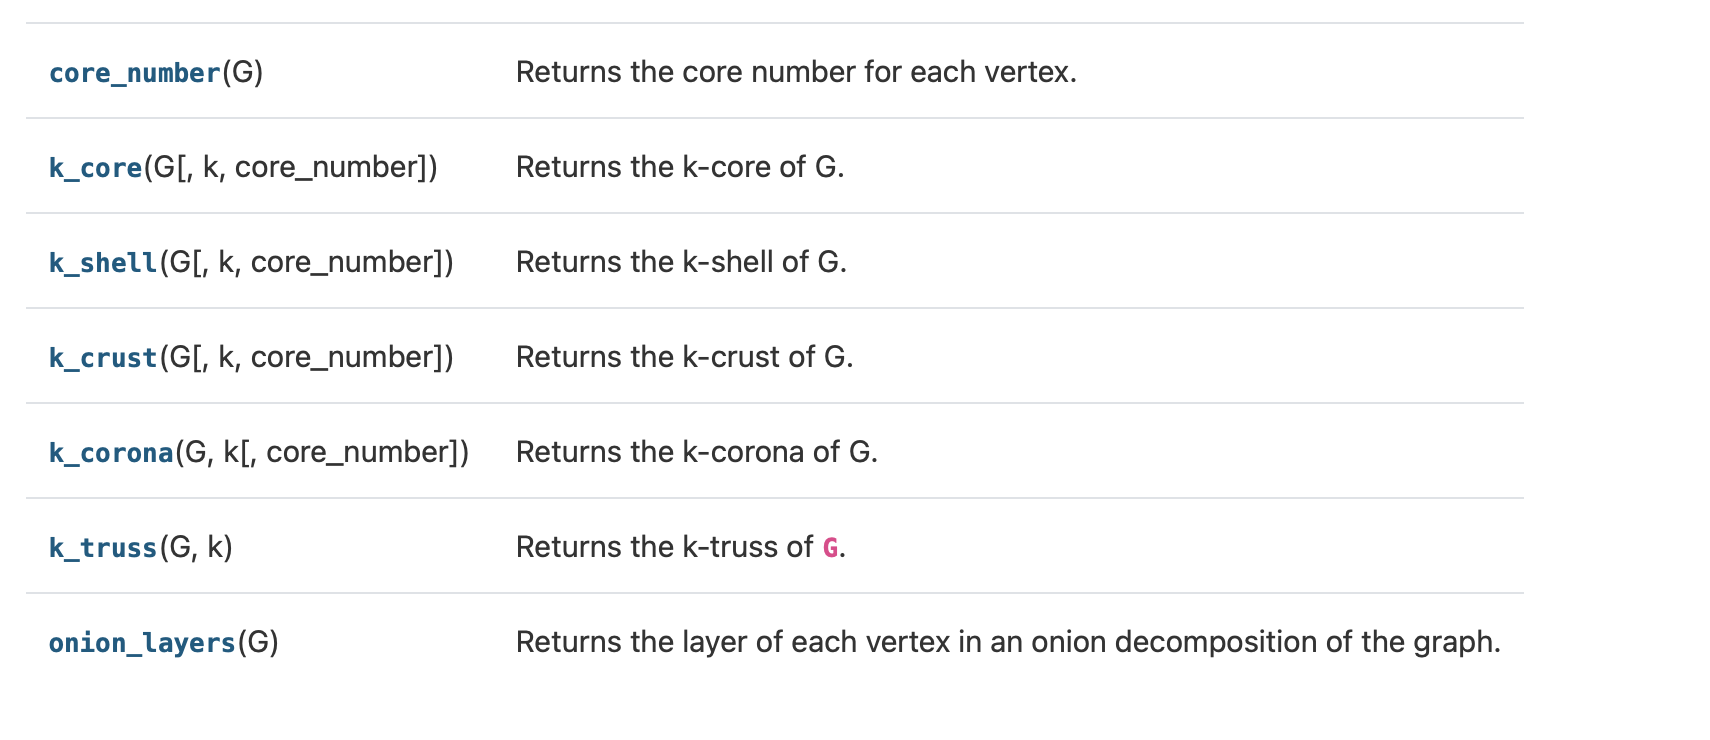

In [ ]:
start = time.time()

In [ ]:
core_number = nx.core_number(graph)
print('core number : {} '.format(core_number))

In [ ]:
k_core_with_k = nx.k_core(graph, k=20, core_number= core_number) #A k-core is a maximal subgraph that contains nodes of degree k or more.
print('K = 10 , k_core : {} '.format(k_core_with_k)) 
plt.figure(figsize=(15,10))
plt.title('k corona with k = 10')
nx.draw(k_core_with_k, with_labels = True)

K = 10 , k_shell : Graph with 229 nodes and 746 edges 


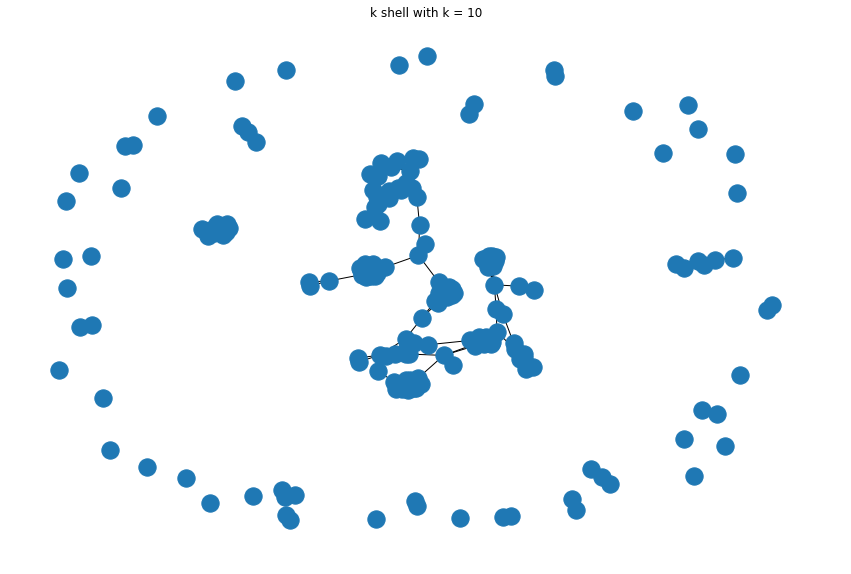

In [ ]:
k_shell_with_k = nx.k_shell(graph, k=10, core_number= core_number) #The k-shell is the subgraph induced by nodes with core number k. That is, nodes in the k-core that are not in the (k+1)-core.
print('K = 10 , k_shell : {} '.format(k_shell_with_k)) 
plt.figure(figsize=(15,10))
plt.title('k shell with k = 10')
nx.draw(k_shell_with_k, with_labels = True)

K = 10 , k_crust : Graph with 4313 nodes and 10172 edges 


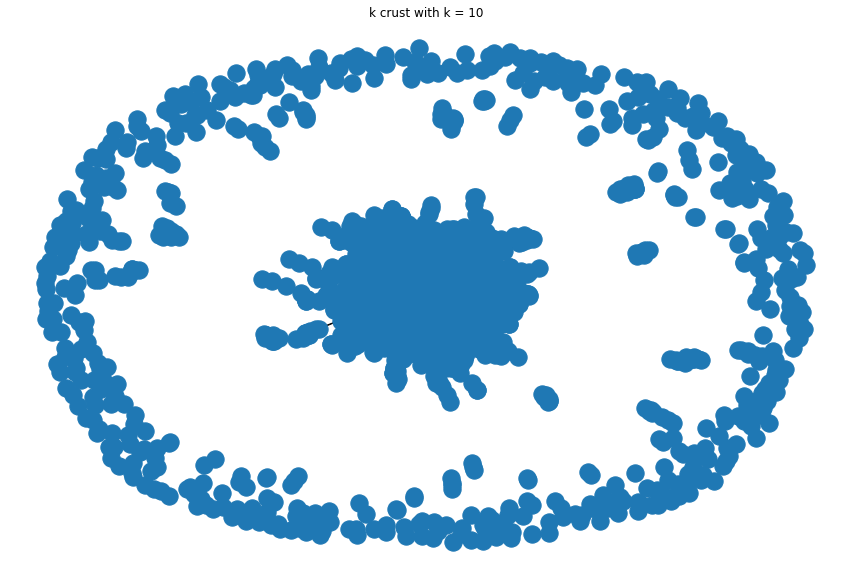

In [ ]:
k_crust_with_k = nx.k_crust(graph, k=10, core_number= core_number) #The k-crust is the graph G with the edges of the k-core removed and isolated nodes found after the removal of edges are also removed.
print('K = 10 , k_crust : {} '.format(k_crust_with_k))
plt.figure(figsize=(15,10))
plt.title('k crust with k = 10')
nx.draw(k_crust_with_k, with_labels = True) 

K = 10 , k_corona : Graph with 88 nodes and 14 edges 


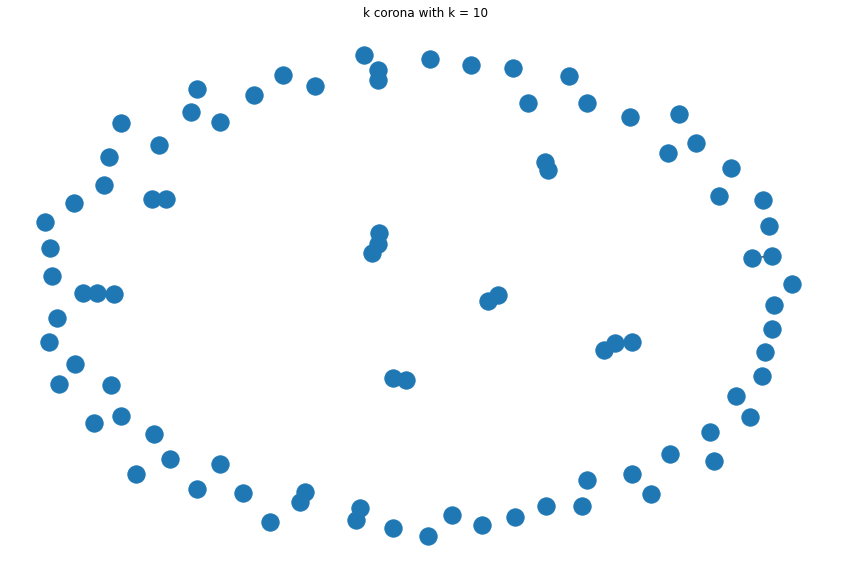

In [ ]:
k_corona_with_k = nx.k_corona(graph, k=10, core_number= core_number) #The k-corona is the subgraph of nodes in the k-core which have exactly k neighbours in the k-core. 
print('K = 10 , k_corona : {} '.format(k_corona_with_k)) 
plt.figure(figsize=(15,10))
plt.title('k corona with k = 10')
nx.draw(k_corona_with_k, with_labels = True) 

K = 10 , k_truss : Graph with 1084 nodes and 16853 edges 


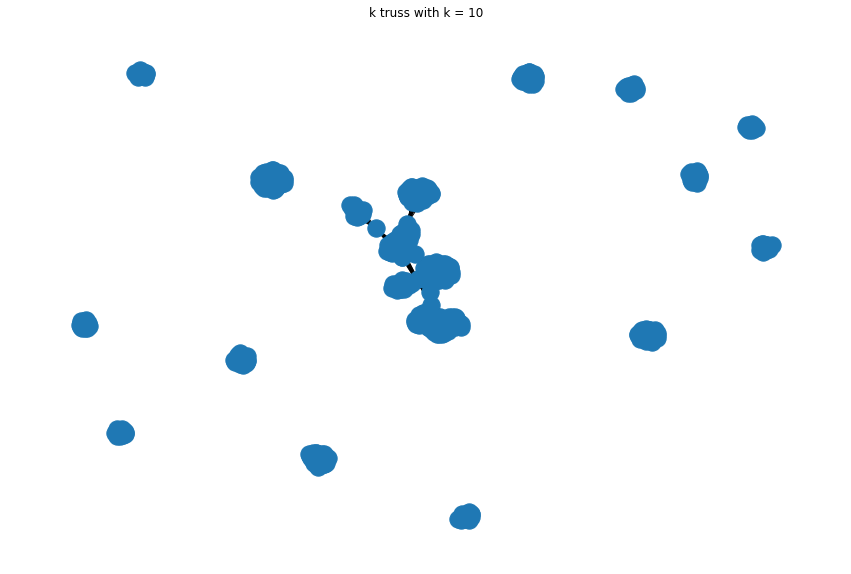

In [ ]:
k_truss_with_k = nx.k_truss(graph, k=10) #The k-truss is the maximal induced subgraph of G which contains at least three vertices where every edge is incident to at least k-2 triangles.
print('K = 10 , k_truss : {} '.format(k_truss_with_k)) 
plt.figure(figsize=(15,10))
plt.title('k truss with k = 10')
nx.draw(k_truss_with_k, with_labels = True)  

In [ ]:
'''
Returns the layer of each vertex in an onion decomposition of the graph.
The onion decomposition refines the k-core decomposition by providing information on the internal organization of each k-shell. 
It is usually used alongside the core numbers.
'''
onion_layer = nx.onion_layers(graph)
print('onion_layer')
print(onion_layer)



onion_layer
{6: 1, 8: 1, 9: 1, 10: 1, 13: 1, 1740: 1, 27: 1, 35: 1, 2597: 1, 4415: 1, 47: 1, 51: 1, 58: 1, 3330: 1, 5850: 1, 75: 1, 76: 1, 1022: 1, 2799: 1, 1347: 1, 1989: 1, 5335: 1, 379: 1, 102: 1, 110: 1, 117: 1, 794: 1, 2315: 1, 144: 1, 149: 1, 176: 1, 4588: 1, 245: 1, 3213: 1, 481: 1, 1750: 1, 1026: 1, 308: 1, 217: 1, 4784: 1, 537: 1, 3592: 1, 454: 1, 2112: 1, 3516: 1, 226: 1, 197: 1, 817: 1, 1034: 1, 219: 1, 1297: 1, 228: 1, 236: 1, 1515: 1, 254: 1, 483: 1, 262: 1, 546: 1, 2434: 1, 281: 1, 283: 1, 285: 1, 290: 1, 1729: 1, 311: 1, 5839: 1, 321: 1, 328: 1, 335: 1, 1524: 1, 339: 1, 1861: 1, 971: 1, 347: 1, 4816: 1, 353: 1, 881: 1, 360: 1, 364: 1, 374: 1, 5269: 1, 386: 1, 392: 1, 5260: 1, 5131: 1, 4738: 1, 3122: 1, 5731: 1, 1555: 1, 4481: 1, 5720: 1, 4847: 1, 4798: 1, 3794: 1, 485: 1, 5208: 1, 3065: 1, 512: 1, 4989: 1, 4492: 1, 3629: 1, 528: 1, 4275: 1, 2927: 1, 2016: 1, 4685: 1, 545: 1, 548: 1, 1994: 1, 564: 1, 1883: 1, 583: 1, 590: 1, 5399: 1, 595: 1, 610: 1, 614: 1, 4130: 1, 5869:

In [ ]:
end = time.time()
print('Tempo trascorso {}'.format(end - start))

**TEORIA VIDEO**
- [K CORE ](https://www.youtube.com/watch?v=rHVrgbc_3JA)
- [K PLEX ](https://www.youtube.com/watch?v=V2CgqTLWxvY)

**TEORIA PAPER**
- [PAPER NETWORKX ](https://www.oreilly.com/library/view/social-network-analysis/9781449311377/ch04.html)

#Centralità 

- Analisi delle centralità !!! Quanto sono importanti i nodi all'interno di un grafo. Calcolare le diverse centralità e vedere se i nodi più importanti rimangono gli stessi o cambiano (se cambiano dire perché. intersecare ad esempio i top10 nodi per ogni centralità). 

- I metodi implemtati sono qui : https://networkx.org/documentation/stable/reference/algorithms/centrality.html

## Degree Centrality 

In [ ]:
start = time.time()
degree_centrality = nx.degree_centrality(graph)
new_data = {k: v for k, v in degree_centrality.items() if v > 0.01} #aggiunto per evitare di stampare tante righe con 0.000... 
print('degree centrality : {}'.format(degree_centrality))

print('degree centrality(newdata) : {}'.format(new_data))
end = time.time()
print('Tempo trascorso {}'.format(end - start))

#ERROR : NetworkXNotImplemented: not implemented for undirected type
#The in-degree centrality for a node v is the fraction of nodes its incoming edges are connected to.
#in_degree_centrality = nx.in_degree_centrality(graph) #ERROR : NetworkXNotImplemented: not implemented for undirected type
#print('in degree centrality : {}'.format(in_degree_centrality))

#The out-degree centrality for a node v is the fraction of nodes its outgoing edges are connected to.
#out_degree_centrality = nx.out_degree_centrality(graph) #ERROR : NetworkXNotImplemented: not implemented for undirected type
#print('out degree centrality : {}'.format(out_degree_centrality))

degree centrality : {0: 0.0074487895716946, 1972: 0.009649568308786187, 5111: 0.00558659217877095, 138: 0.0035551041137633316, 3053: 0.0032165227695953955, 1473: 0.0035551041137633316, 4978: 0.005925173522938886, 4523: 0.009141696292534281, 2334: 0.007956661587946504, 1038: 0.0033858134416793638, 3923: 0.0030472320975114273, 3874: 0.0045708481462671405, 766: 0.0111731843575419, 98: 0.024547147452175386, 2676: 0.008633824276282377, 1547: 0.006433045539190791, 3622: 0.007618080243778568, 5292: 0.00558659217877095, 5455: 0.0037243947858473, 2755: 0.005078720162519045, 568: 0.005755882850854918, 1849: 0.01218892839004571, 980: 0.004909429490435077, 1578: 0.0052480108346030134, 4674: 0.00931098696461825, 876: 0.00931098696461825, 3842: 0.0030472320975114273, 5866: 0.005925173522938886, 3883: 0.012358219062129677, 2524: 0.014558997799221263, 961: 0.012866091078381582, 5154: 0.007956661587946504, 3372: 0.003893685457931268, 2639: 0.010496021669206027, 3099: 0.024547147452175386, 2852: 0.00558

## eigenvector centrality

In [ ]:
start = time.time()
centrality = nx.eigenvector_centrality(graph)
for v, c in sorted(centrality.items()):
  if c > 0.1: #aggiunto per evitare di stampare tante righe con 0.00 
    print(f"{v} {c:.2f}")
end = time.time()
print('Tempo trascorso {}'.format(end - start))

210 0.13
516 0.10
726 0.14
837 0.11
1127 0.10
1371 0.12
1400 0.10
1414 0.16
1474 0.13
1595 0.17
1641 0.11
1651 0.14
2770 0.14
3281 0.12
4032 0.14
4081 0.12
4160 0.12
4602 0.17
4622 0.12
4878 0.12
4972 0.16
5072 0.13
5416 0.17
5726 0.15
5797 0.12
5808 0.10
5871 0.13
Tempo trascorso 1.3337202072143555


## katz centrality

In [ ]:
#ERROR : PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 1000 iterations')

#alpha float : Attenuation factor
#beta scalar or dictionary, optional (default=1.0) Weight attributed to the immediate neighborhood. If not a scalar, the dictionary must have an value for every node.
#max_iter integer, optional (default=1000) Maximum number of iterations in power method.
#tol float, optional (default=1.0e-6) Error tolerance used to check convergence in power method iteration.
#nstart dictionary, optional Starting value of Katz iteration for each node.
#normalized bool, optional (default=True) If True normalize the resulting values.
#weight None or string, optional (default=None) If None, all edge weights are considered equal. Otherwise holds the name of the edge attribute used as weight. In this measure the weight is interpreted as the connection strength.

import math
start = time.time()
centrality = nx.katz_centrality(graph, alpha=0.1, max_iter=4000,  beta=1.0)
for n, c in sorted(centrality.items()):
  print(f"{n} {c:.2f}")
end = time.time()
print('Tempo trascorso {}'.format(end - start))

#NOTA DENIS: Processo davvero lungo oltre i 5 min 

KeyboardInterrupt: ignored

## closeness centrality

In [ ]:
#u node, optional Return only the value for node u
#distance edge attribute key, optional (default=None), Use the specified edge attribute as the edge distance in shortest path calculations
#wf_improved bool, optional (default=True) If True, scale by the fraction of nodes reachable. This gives the Wasserman and Faust improved formula. For single component graphs it is the same as the original formula.

start = time.time()
closeness_centrality = nx.closeness_centrality(graph, u=None, distance=None, wf_improved=True)
print(closeness_centrality)
end = time.time()
print('Tempo trascorso {}'.format(end - start))

{0: 0.24790162833641094, 1972: 0.28500434237190003, 5111: 0.24066001222244857, 138: 0.23457231355730285, 3053: 0.23738144992766436, 1473: 0.23401473734252437, 4978: 0.23982947624847747, 4523: 0.2543599018214701, 2334: 0.244484913703903, 1038: 0.23984895241188892, 3923: 0.23123899001761597, 3874: 0.23890798786653186, 766: 0.24450515335899664, 98: 0.2734722222222222, 2676: 0.24562351864942408, 1547: 0.2442120059533653, 3622: 0.2536281665951052, 5292: 0.2390626897082035, 5455: 0.2416049736185529, 2755: 0.24375851112119837, 568: 0.25666985313287566, 1849: 0.24502239920358387, 980: 0.24440398858041293, 1578: 0.2353386454183267, 4674: 0.2558361124344926, 876: 0.2520373767973717, 3842: 0.2372098626616336, 5866: 0.23890798786653186, 3883: 0.2445152744432486, 2524: 0.24375851112119837, 961: 0.24722722136190517, 5154: 0.24657705793955587, 3372: 0.2344791997459511, 2639: 0.25405358909294223, 3099: 0.29532046795320466, 2852: 0.24362781489730265, 1909: 0.25248984825817483, 4537: 0.2422291478717297,

## current flow closeness centrality

In [ ]:
#G graph A NetworkX graph.
#weight None or string, optional (default=None) If None, all edge weights are considered equal. Otherwise holds the name of the edge attribute used as weight. The weight reflects the capacity or the strength of the edge.
#dtype: data type (default=float) Default data type for internal matrices. Set to np.float32 for lower memory consumption.
# solver: string (default=’lu’) Type of linear solver to use for computing the flow matrix. Options are “full” (uses most memory), “lu” (recommended), and “cg” (uses least memory).

start = time.time()
current_flow_closeness_centrality = nx.current_flow_closeness_centrality(graph, weight=None, dtype='float', solver='lu')
print(current_flow_closeness_centrality)
end = time.time()
print('Tempo trascorso {}'.format(end - start))


{0: 0.0004393254177003984, 1972: 0.0004462543436699694, 5111: 0.0004312495630685831, 138: 0.00041181132343204936, 3053: 0.0004070059054893687, 1473: 0.0004117320468420269, 4978: 0.0004318244915644092, 4523: 0.0004458799378061686, 2334: 0.00044166247497402875, 1038: 0.00040961945076295844, 3923: 0.00040476452852287813, 3874: 0.0004229956891828796, 766: 0.0004486819737981928, 98: 0.0004595994587805288, 2676: 0.00044274667864331916, 1547: 0.00043486505130600024, 3622: 0.0004402829424249572, 5292: 0.00043025702612443397, 5455: 0.00041436995960411876, 2755: 0.00042688129274332713, 568: 0.0004323924252706241, 1849: 0.00045041850885228904, 980: 0.00042611501143061743, 1578: 0.0004282974133390145, 4674: 0.0004466367355974537, 876: 0.0004450214698951179, 3842: 0.0004033498838404219, 5866: 0.0004319620175775255, 3883: 0.00045059183952347935, 2524: 0.00045318034972012425, 961: 0.0004515171417444568, 5154: 0.0004409009229362941, 3372: 0.0004156216350358268, 2639: 0.0004476797318944843, 3099: 0.000

## (Shortest Path) Betweenness & Edge Betweenness Centrality

In [ ]:
#C'è anche l'opzione subset 

start = time.time()
betweenness_centrality = nx.betweenness_centrality(graph, k=10, normalized=True, weight=None, endpoints=False, seed=None)
print(betweenness_centrality)
end = time.time()
print('Tempo trascorso {}'.format(end - start))

print('-----------')

start = time.time()
edge_betweenness_centrality = nx.edge_betweenness_centrality(graph, k=10, normalized=True, weight=None, seed=None)
print(edge_betweenness_centrality)
end = time.time()
print('Tempo trascorso {}'.format(end - start))

{0: 6.628911785911338e-05, 1972: 0.004283353773836842, 5111: 1.8470788019844298e-05, 138: 1.449061016838441e-05, 3053: 1.8359323037344577e-05, 1473: 2.4970977036172297e-05, 4978: 3.309470338267393e-05, 4523: 0.0062026014218670945, 2334: 6.122260535910877e-05, 1038: 1.5514235004876887e-05, 3923: 7.806239531297558e-05, 3874: 2.3100433350241337e-05, 766: 8.551669456510596e-05, 98: 0.004892564044925793, 2676: 7.054013631340521e-05, 1547: 5.745656936238595e-05, 3622: 0.0009739481210072953, 5292: 2.9268925024028768e-05, 5455: 3.284454568414665e-05, 2755: 9.1446479463299e-05, 568: 6.136072611711856e-05, 1849: 0.0002262470143700965, 980: 1.9552639093458207e-05, 1578: 2.5016914564170278e-05, 4674: 0.0015247764997076267, 876: 0.00017720354295395045, 3842: 2.1933936819096187e-05, 5866: 3.310412860005405e-05, 3883: 8.25478139721477e-05, 2524: 9.830703868386292e-05, 961: 0.00016082305791556586, 5154: 8.314182908564397e-05, 3372: 1.3573575248262599e-05, 2639: 0.00019382420599286447, 3099: 0.01338170

## Current Flow Betweenness

In [ ]:
#C'è anche l'opzione subset e approximate

start = time.time()
current_flow_betweenness_centrality = nx.current_flow_betweenness_centrality(graph, normalized=True, weight=None, dtype='float', solver='full')
print(current_flow_betweenness_centrality)
end = time.time()
print('Tempo trascorso {}'.format(end - start))

print('-----------')

start = time.time()
edge_current_flow_betweenness_centrality = nx.edge_current_flow_betweenness_centrality(G, normalized=True, weight=None, dtype='float', solver='full')
print(edge_current_flow_betweenness_centrality)
end = time.time()
print('Tempo trascorso {}'.format(end - start))

KeyboardInterrupt: ignored

## Communicability Betweenness

In [ ]:
start = time.time()
cbc = nx.communicability_betweenness_centrality(graph)
print([f"{node} {cbc[node]:0.2f}" for node in sorted(cbc)])
end = time.time()
print('Tempo trascorso {}'.format(end - start))

KeyboardInterrupt: ignored

## Group Centrality 

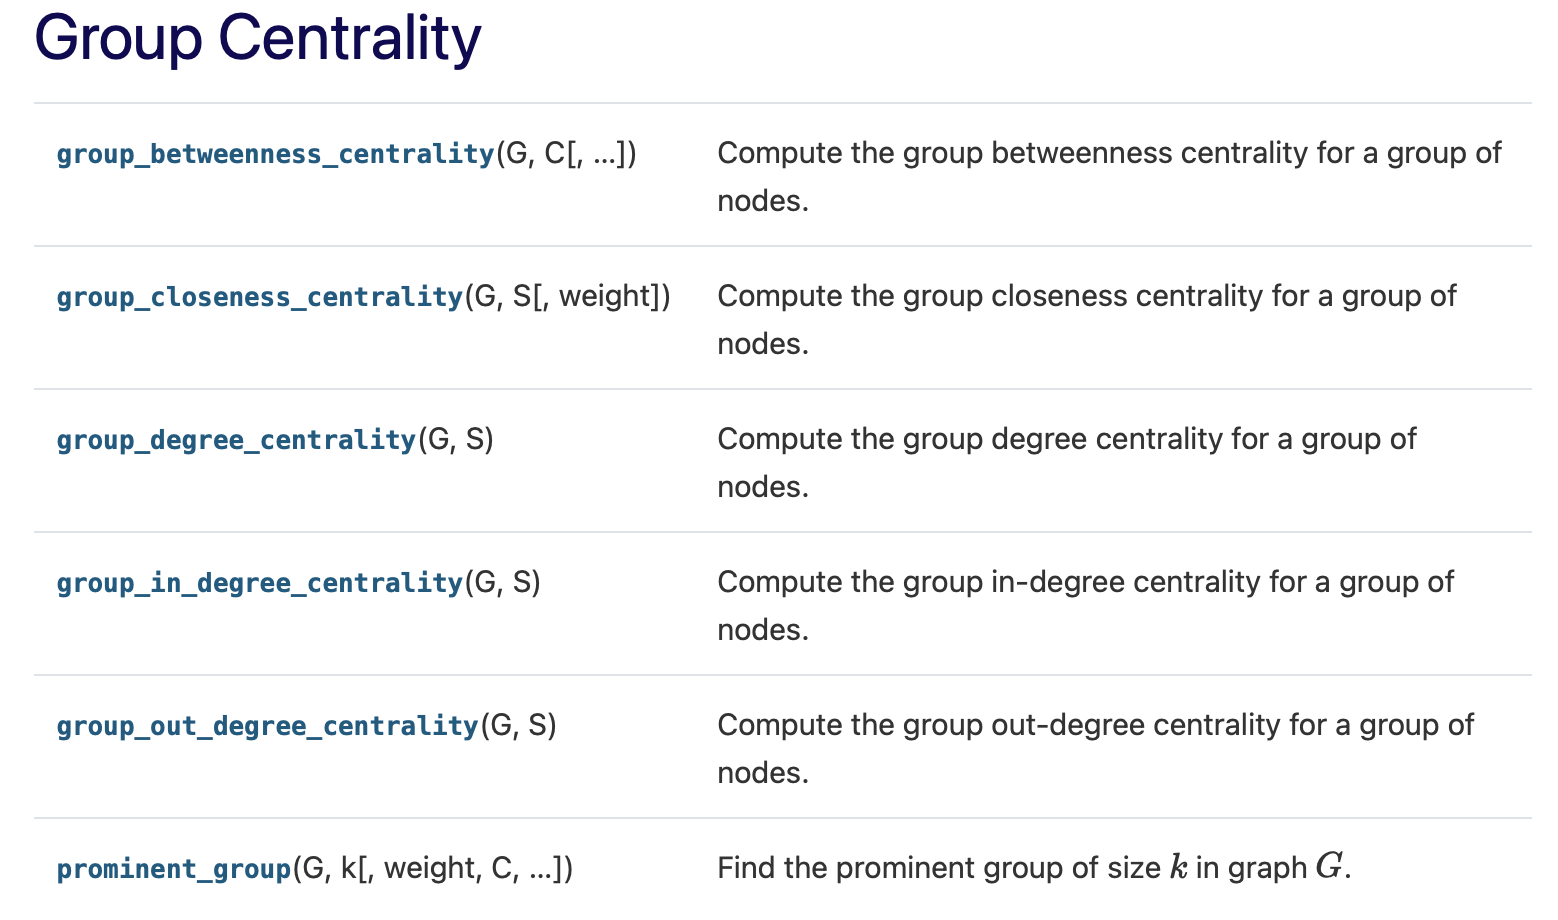

In [ ]:
start = time.time()
C = {1: 2010, 2: 1972} # C is a list or set or list of lists or list of sets, A group or a list of groups containing nodes which belong to G, for which group betweenness centrality is to be calculated.
group_betweenness_centrality = nx.group_betweenness_centrality(graph, C, normalized=True, weight=None, endpoints=False)
print(group_betweenness_centrality)
end = time.time()
print('Tempo trascorso {}'.format(end - start))

KeyboardInterrupt: ignored

## Load Centrality 

In [ ]:
#C'è anche l'opzione per gli edge : edge_load_centrality 

#The load centrality of a node is the fraction of all shortest paths that pass through that node.
#cutoff is bool, optional (default=None) If specified, only consider paths of length <= cutoff.
start = time.time()
load_centrality = nx.load_centrality(graph, v=None, cutoff=None, normalized=True, weight=None)
print(load_centrality)
end = time.time()
print('Tempo trascorso {}'.format(end - start))

## Subgraph Centrality

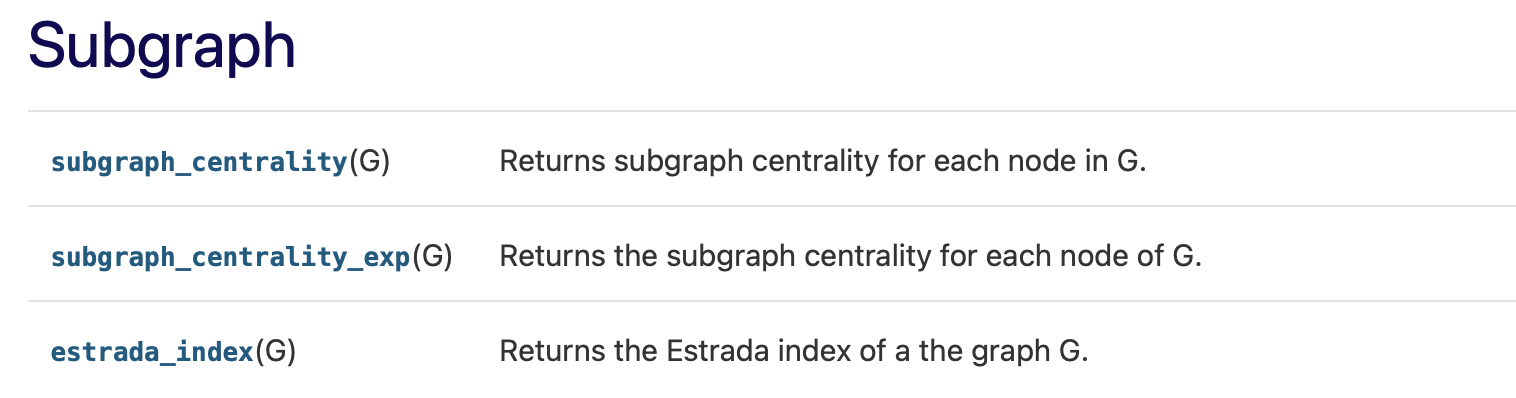

In [ ]:
#Subgraph centrality of a node n is the sum of weighted closed walks of all lengths starting and ending at node n. 
#The weights decrease with path length. Each closed walk is associated with a connected subgraph ([1]).

start = time.time()
subgraph_centrality = nx.subgraph_centrality(graph)
print(subgraph_centrality)
end = time.time()
print('Tempo trascorso {}'.format(end - start))


{0: 4.675607113718987e+21, 1972: 1.7977057268346061e+22, 5111: 6.716561986889182e+21, 138: 7.819378524433741e+20, 3053: 8.511398632622905e+20, 1473: 9.668382361229715e+20, 4978: 1.8483470653887645e+21, 4523: 8.604935100616148e+21, 2334: 6.86895457592528e+21, 1038: 1.0755283985156056e+21, 3923: 2.4897217621588656e+20, 3874: 1.2315652432002063e+21, 766: 1.4840507290186957e+22, 98: 1.8148461455965564e+23, 2676: 5.810552207228176e+21, 1547: 2.9472062422322575e+21, 3622: 6.419261841060514e+21, 5292: 1.7324226889931885e+21, 5455: 1.186253728536306e+21, 2755: 2.5449796743918796e+21, 568: 1.8446274740746382e+22, 1849: 3.0239254391127903e+22, 980: 2.753574214543995e+21, 1578: 1.8516658257498444e+21, 4674: 4.5192459292838907e+21, 876: 8.764524101788754e+21, 3842: 6.682435151324276e+20, 5866: 1.8726537644744562e+21, 3883: 2.262944094681304e+22, 2524: 2.947408740763733e+22, 961: 2.918984146909427e+22, 5154: 5.643109612145214e+21, 3372: 6.872788341537804e+20, 2639: 1.0197270769817004e+22, 3099: 1.0

<Figure size 1080x720 with 0 Axes>

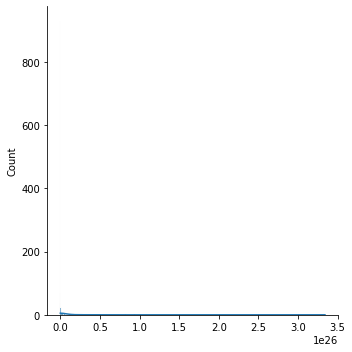

In [ ]:
#Fare la visualizzazione del grafo. Quando calcoliamo le centralità non ci conviene il barplot in quanto abbiamo molti nodi, 
#conviene il distplot, che ci dà la distribuzione della centralità fra i nodi.
new_data = {k: v for k, v in subgraph_centrality.items() if v > 1e21} #aggiunto per velocizzare un po'
plt.figure(figsize=(15,10))
sns.displot(list(new_data.values()), kde=True)

#NOTA DENIS : ci mette un casino senza il new_data che non fa altro che eliminare valori con una soglia 

## harmonic centrality

In [ ]:
#Compute harmonic centrality for nodes.
#Harmonic centrality of a node u is the sum of the reciprocal of the shortest path distances from all other nodes to u
#nbunch container (default: all nodes in G) - Container of nodes for which harmonic centrality values are calculated.

start = time.time()
harmonic_centrality = nx.harmonic_centrality(graph, nbunch=None, distance=None, sources=None)
print(harmonic_centrality)
end = time.time()
print('Tempo trascorso {}'.format(end - start))

{0: 1584.738492063539, 1: 1527.3555555556165, 2: 1424.7222222223072, 3: 1342.2738455989102, 4: 1407.0531746032593, 5: 1303.385714285793, 6: 957.144841269795, 7: 980.2515873015378, 8: 1390.9766233766993, 9: 1143.618253968249, 10: 1011.336544011499, 11: 1629.6400793651155, 12: 1297.4444444445141, 13: 1485.8380952381626, 14: 1101.5405122655038, 15: 1217.7960678211332, 16: 1230.1246031746732, 17: 1436.2194444445167, 18: 1825.0753968253784, 19: 1196.8980158730706, 20: 1457.9702380953147, 21: 1337.9917027417787, 22: 1551.5892857143476, 23: 1187.7766233766647, 24: 1378.7888888889702, 25: 1312.2726551227336, 26: 1588.0071428571857, 27: 1269.9032106782624, 28: 1350.190873015953, 29: 1277.5829725830283, 30: 1200.5238455988954, 31: 1230.341702741763, 32: 1487.8380952381622, 33: 1528.801190476246, 34: 1415.7234126984788, 35: 1143.618253968249, 36: 1308.0329365080202, 37: 1389.1492063492826, 38: 1321.2674603175424, 39: 1398.3531746032468, 40: 1263.85873015879, 41: 1150.9115079365388, 42: 1439.92063

## dispersion

In [ ]:
#Calculate dispersion between u and v in G. A link between two actors (u and v) has a high dispersion when their mutual ties (s and t) are not well connected with each other.
start = time.time()
dispersion = nx.dispersion(graph, u=None, v=None, normalized=True, alpha=1.0, b=0.0, c=0.0)
print(dispersion)
end = time.time()
print('Tempo trascorso {}'.format(end - start))


{0: {1972: 0.0, 5111: 0.0, 138: 0.0, 3053: 0.0, 1473: 0.0, 4978: 0.0, 4523: 0.0, 2334: 0.0, 1038: 0.0, 3923: 0.0, 3874: 0.0, 766: 0.027777777777777776, 98: 0.0, 2676: 0.0, 1547: 0.0, 3622: 0.0, 5292: 0.0, 5455: 0.0, 2755: 0.0, 568: 0.0, 1849: 0.0, 980: 0.0, 1578: 0.0, 4674: 0.0, 876: 0.0, 3842: 0.0, 5866: 0.0, 3883: 0.0, 2524: 0.0, 961: 0.0, 5154: 0.0, 3372: 0.0, 2639: 0.0, 3099: 0.0, 2852: 0.0, 1909: 0.0, 4537: 0.0, 1676: 0.0, 4924: 0.027777777777777776, 724: 0.0, 5855: 0.0, 4157: 0.0, 2051: 0.0, 4630: 0.0}, 1972: {0: 0.0, 98: 0.23684210526315788, 138: 0.0, 480: 0.0, 3087: 0.0, 688: 0.0, 724: 0.041666666666666664, 766: 0.0, 848: 0.0, 876: 0.0, 961: 0.0, 980: 0.0, 1038: 0.0, 1067: 0.0, 5111: 0.0, 3665: 0.0, 3377: 0.2, 3053: 0.0, 4033: 0.0, 2524: 0.15384615384615385, 253: 0.0, 4978: 0.0, 4523: 0.0, 2334: 0.0, 4185: 0.0, 3874: 0.0, 2676: 0.0, 2998: 0.0, 3622: 0.0, 5292: 0.0, 3489: 0.0, 5455: 0.0, 2755: 0.0, 1578: 0.0, 2569: 0.0, 2639: 0.0, 3842: 0.0, 1473: 0.0, 5866: 0.0, 3883: 0.0, 5154

## Local Reaching Centrality (IL GRAFO DEVE ESSERE ORIENTATO) - NON IMPLEMENTATO

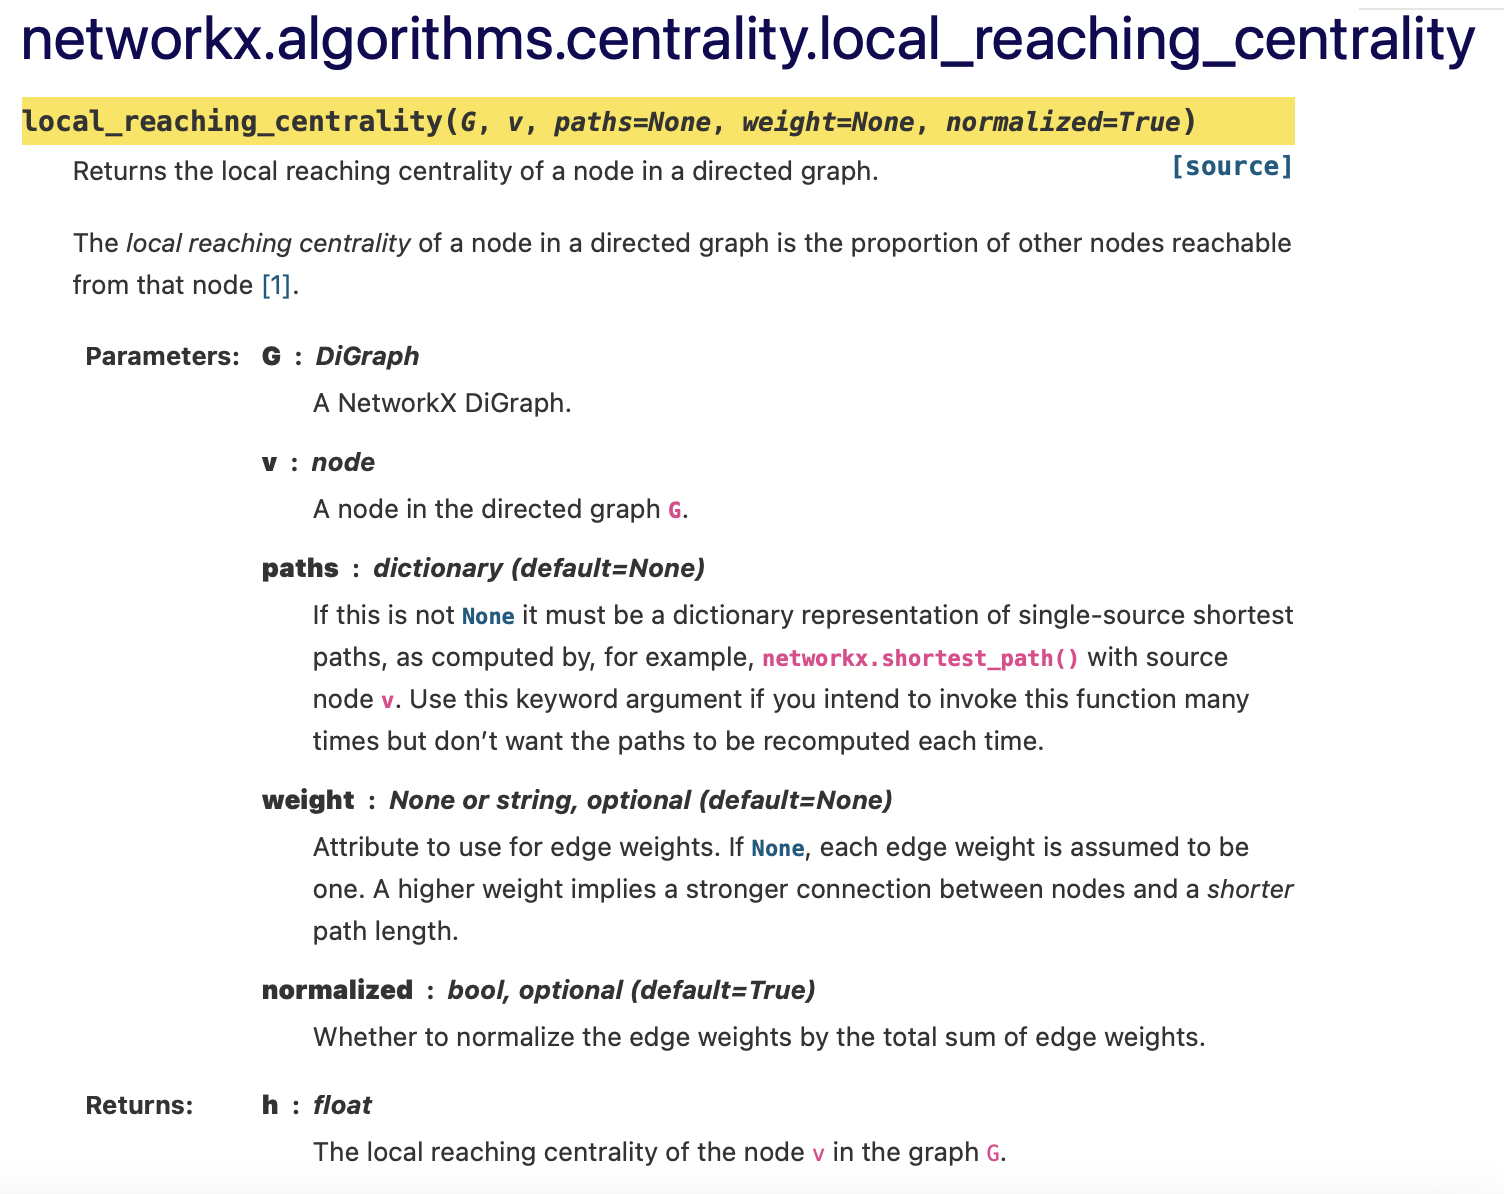

Analogo discorso per il global_reaching_centrality

## Percolation Centrality

Compute the percolation centrality for nodes.

Percolation centrality of a node v, at a given time, is defined as the proportion of ‘percolated paths’ that go through that node.

This measure quantifies relative impact of nodes based on their topological connectivity, as well as their percolation states.

Percolation states of nodes are used to depict network percolation scenarios (such as during infection transmission in a social network of individuals, spreading of computer viruses on computer networks, or transmission of disease over a network of towns) over time. In this measure usually the percolation state is expressed as a decimal between 0.0 and 1.0.

When all nodes are in the same percolated state this measure is equivalent to betweenness centrality.

In [ ]:
start = time.time()
percolation_centrality = nx.percolation_centrality(graph, attribute='percolation', states=None, weight=None)
print(percolation_centrality)
end = time.time()
print('Tempo trascorso {}'.format(end - start))

KeyError: ignored

## Second Order Centrality

In [ ]:
#The second order centrality of a given node is the standard deviation of the return times to that node of a perpetual random walk on G
#Lower values of second order centrality indicate higher centrality.
start = time.time()
second_order_centrality = nx.second_order_centrality(graph)
print(sorted(second_order_centrality.items(), key=lambda x: x[1])[0][0]) # # pick first id
end = time.time()
print('Tempo trascorso {}'.format(end - start))

KeyboardInterrupt: ignored

## Trophic (NON IMPLEMENTATO) 

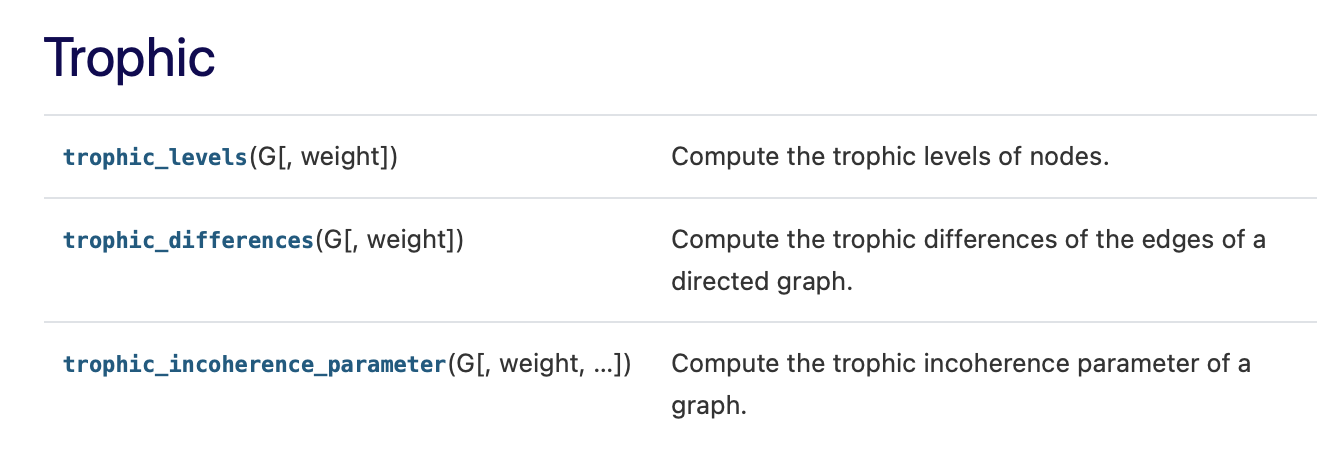

## Vote Rank 

In [ ]:
#VoteRank - computes a ranking of the nodes in a graph G based on a voting scheme. 
#With VoteRank, all nodes vote for each of its in-neighbours and the node with the highest votes is elected iteratively. 
#The voting ability of out-neighbors of elected nodes is decreased in subsequent turns.
#Note: We treat each edge independently in case of multigraphs.

start = time.time()
vote_rank = nx.voterank(graph, number_of_nodes=30)
print(vote_rank)
end = time.time()
print('Tempo trascorso {}'.format(end - start))


[1864, 4874, 5800, 5416, 1595, 4602, 3576, 3008, 1474, 2386, 147, 4032, 5855, 112, 3099, 98, 5867, 4972, 4081, 1965, 191, 1374, 1324, 5538, 2218, 1414, 2060, 2698, 175, 641]
Tempo trascorso 1.401965618133545


# Altro per plot 

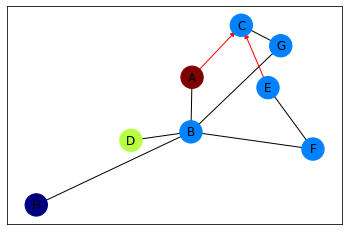

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('A', 'C'), ('E', 'C')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()